In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

# Data Understanding

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 99)

In [4]:
data = pd.read_csv("/content/drive/MyDrive/vix/loan_data_2007_2014.csv")

<ipython-input-4-bb9615d20b20>:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/vix/loan_data_2007_2014.csv")


In [5]:
data.shape

(466285, 75)

In [6]:
#melihat kolom
data.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verificatio

In [7]:
data.head(1)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.0,861.07,0.0,0.0,0.0,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# cek data null
data.isnull().sum()

Unnamed: 0                          0
id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       27588
emp_length                      21008
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           340302
purpose                             0
title                              20
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs 

In [9]:
## drop data yang tidak digunakan

drop_cols = ['Unnamed: 0','id' , 'member_id',
             'url', 'desc',
             'zip_code' , 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m',
             'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m',
             'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m','sub_grade'
              ]

In [10]:
data_drop = data.drop(drop_cols, axis=1)

In [11]:
data_drop.sample(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
231602,10000,10000,10000.0,36 months,13.66,340.13,C,Auditorium Supervisor,1 year,MORTGAGE,30000.0,Verified,Dec-14,Current,n,debt_consolidation,Debt consolidation,IN,13.00,0.0,Aug-09,1.0,29.0,NaN,14.0,0.0,9741,25.8,27.0,f,7107.80,7107.80,4073.97,4073.97,2892.20,1181.77,0.0,0.00,0.0000,Dec-15,340.13,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,20842.0,37800.0
238023,20000,20000,20000.0,36 months,11.44,658.95,B,Registered nurse,5 years,RENT,80000.0,Source Verified,Dec-14,Fully Paid,n,debt_consolidation,Debt consolidation,CT,20.64,0.0,Aug-01,0.0,66.0,NaN,20.0,0.0,14761,55.7,35.0,f,0.00,0.00,21553.84,21553.84,20000.00,1553.84,0.0,0.00,0.0000,Sep-15,16294.95,NaN,Nov-15,0.0,NaN,1,INDIVIDUAL,0.0,0.0,74719.0,26500.0
94610,16000,16000,15975.0,36 months,9.71,514.10,B,AutoZone,6 years,RENT,40000.0,Not Verified,Sep-13,Current,n,debt_consolidation,Get Out of Debt,CO,7.26,0.0,Mar-07,0.0,NaN,NaN,9.0,0.0,9943,60.3,12.0,f,3969.09,3962.88,14392.00,14369.52,12030.91,2361.09,0.0,0.00,0.0000,Jan-16,514.10,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,45168.0,16500.0
295398,22000,22000,22000.0,36 months,10.15,711.43,B,Financial Analyst,2 years,RENT,60000.0,Source Verified,Oct-14,Current,n,debt_consolidation,Debt consolidation,WY,24.03,0.0,Jan-66,0.0,NaN,NaN,10.0,0.0,23969,87.8,17.0,w,13635.68,13635.68,10671.45,10671.45,8364.32,2307.13,0.0,0.00,0.0000,Jan-16,711.43,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,41545.0,65600.0
52564,10000,10000,10000.0,60 months,14.98,237.80,C,Program Analyst,10+ years,MORTGAGE,83884.0,Verified,Dec-13,Charged Off,n,debt_consolidation,DEBT CONSOLIDATION,GA,6.78,4.0,May-99,1.0,1.0,NaN,6.0,0.0,8460,0.0,27.0,w,0.00,0.00,4605.07,4605.07,1472.23,1619.17,0.0,1513.67,15.1367,Feb-15,237.80,NaN,Jun-15,0.0,1.0,1,INDIVIDUAL,3.0,0.0,279560.0,12000.0


#Data Preparation

In [12]:
data_prep = data_drop.copy()

## labeling data

variabel target yang akan digunakan dan nilai variabel itu harus menggambarkan kemampuan target

In [13]:
data_prep.loan_status.value_counts(normalize=True)*100

Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: loan_status, dtype: float64

membagi status pada loan_status menjadi good loan atau bad loan.
*   `Current` : pembayaran lancar
*  `Charged Off`:  pembayaran macet sehingga dihapusbukukan
*   `Late` : pembayaran telat dilakukan
*   `In Grace Period` : dalam masa tenggang
*   `Fully Paid` : pembayaran lunas
*   `Default` : pembayaran macet



In [14]:
bad_status = [
    'Charged Off' ,'Default' , 'Does not meet the credit policy. Status:Charged Off', 'Late (31-120 days)'
    ]
data_prep['bad_flag'] = np.where(data_prep['loan_status'].isin(bad_status), 1, 0)

In [15]:
data_prep['bad_flag'].value_counts(normalize=True)*100

0    89.069346
1    10.930654
Name: bad_flag, dtype: float64

In [16]:
data_prep.drop('loan_status', axis=1, inplace=True)

## Data Cleaning

### emp_length

menggganti karakter selain angka pada kolom emp_length dan mengganti tipe data

In [17]:
data_prep['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [18]:
data_prep['emp_length_int'] = data_prep['emp_length'].str.replace('\+ years', '')
data_prep['emp_length_int'] = data_prep['emp_length_int'].str.replace('< 1 year', str(0))
data_prep['emp_length_int'] = data_prep['emp_length_int'].str.replace(' years', '')
data_prep['emp_length_int'] = data_prep['emp_length_int'].str.replace(' year', '')

<ipython-input-18-72a0882ee6c1>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data_prep['emp_length_int'] = data_prep['emp_length'].str.replace('\+ years', '')


In [19]:
data_prep['emp_length_int'] = data_prep['emp_length_int'].astype(float)

In [20]:
data_prep.drop('emp_length', axis=1, inplace=True)

### term

menghilangkan katakter selain angka dan mengubah tipe data kolom term

In [21]:
data_prep['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [22]:
data_prep['term_int'] = data_prep['term'].str.replace(' months', '')
data_prep['term_int'] = data_prep['term_int'].astype(float)

In [23]:
data_prep.drop('term', axis=1, inplace=True)

###earliest_cr_line

mengganti format bulan-tahun menajadi lama waktu berlalu dengan tahun reverensi 2017-12-1

In [24]:
data_prep['earliest_cr_line'].head(3)

0    Jan-85
1    Apr-99
2    Nov-01
Name: earliest_cr_line, dtype: object

In [25]:
data_prep['earliest_cr_line_date'] = pd.to_datetime(data_prep['earliest_cr_line'], format='%b-%y')
data_prep['earliest_cr_line_date'].head(3)

0   1985-01-01
1   1999-04-01
2   2001-11-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [26]:
data_prep['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data_prep['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
data_prep['mths_since_earliest_cr_line'].head(3)

0    395.0
1    224.0
2    193.0
Name: mths_since_earliest_cr_line, dtype: float64

In [27]:
data_prep['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [28]:
data_prep[data_prep['mths_since_earliest_cr_line']<0][['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']].head(3)

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0


terdapat data negatif yang diakibatkan python menganggap tahun 1962 sebagai 2062.

In [29]:
# mengganti data negatif dengan nilai maksimal dari kolom
data_prep.loc[data_prep['mths_since_earliest_cr_line']<0, 'mths_since_earliest_cr_line'] = data_prep['mths_since_earliest_cr_line'].max()

In [30]:
data_prep.drop(['earliest_cr_line', 'earliest_cr_line_date'], axis=1, inplace=True)

### issue_d

membuat kolom baru dengan nilai banyak bulan dari kolom awal dengan tanggal referensi

In [31]:
data_prep['issue_d'].head(3)

0    Dec-11
1    Dec-11
2    Dec-11
Name: issue_d, dtype: object

In [32]:
data_prep['issue_d_date'] = pd.to_datetime(data_prep['issue_d'], format='%b-%y')
data_prep['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data_prep['issue_d_date']) / np.timedelta64(1, 'M')))

In [33]:
data_prep['mths_since_issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

In [34]:
data_prep.drop(['issue_d', 'issue_d_date'], axis=1, inplace=True)

###last_pymnt_d

membuat kolom baru dengan nilai banyak bulan dari kolom awal dengan tanggal referensi

In [35]:
data_prep['last_pymnt_d_date'] = pd.to_datetime(data_prep['last_pymnt_d'], format='%b-%y')
data_prep['mths_since_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data_prep['last_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [36]:
data_prep['mths_since_last_pymnt_d'].describe()

count    465909.000000
mean         31.294369
std          12.809898
min          23.000000
25%          23.000000
50%          24.000000
75%          35.000000
max         120.000000
Name: mths_since_last_pymnt_d, dtype: float64

In [37]:
data_prep.drop(['last_pymnt_d', 'last_pymnt_d_date'], axis=1, inplace=True)

###next_pymnt_d

membuat kolom baru dengan nilai banyak bulan dari kolom awal dengan tanggal referensi

In [38]:
data_prep['next_pymnt_d_date'] = pd.to_datetime(data_prep['next_pymnt_d'], format='%b-%y')
data_prep['mths_since_next_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data_prep['next_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [39]:
data_prep['mths_since_next_pymnt_d'].describe()

count    239071.000000
mean         22.738136
std           6.082298
min          21.000000
25%          22.000000
50%          22.000000
75%          22.000000
max         120.000000
Name: mths_since_next_pymnt_d, dtype: float64

In [40]:
data_prep.drop(['next_pymnt_d', 'next_pymnt_d_date'], axis=1, inplace=True)

### last_credit_pull_d

membuat kolom baru dengan nilai banyak bulan dari kolom awal dengan tanggal referensi

In [41]:
data_prep['last_credit_pull_d_date'] = pd.to_datetime(data_prep['last_credit_pull_d'], format='%b-%y')
data_prep['mths_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data_prep['last_credit_pull_d_date']) / np.timedelta64(1, 'M')))

In [42]:
data_prep['mths_since_last_credit_pull_d'].describe()

count    466243.000000
mean         27.045588
std           9.636423
min          23.000000
25%          23.000000
50%          23.000000
75%          25.000000
max         127.000000
Name: mths_since_last_credit_pull_d, dtype: float64

In [43]:
data_prep.drop(['last_credit_pull_d', 'last_credit_pull_d_date'], axis=1, inplace=True)

#Data Preprocessing

In [44]:
data_corr = data_prep.copy()

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Drop Data

### remove high correlation feature

<ipython-input-46-730105a1e0a2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_corr.corr())


<Axes: >

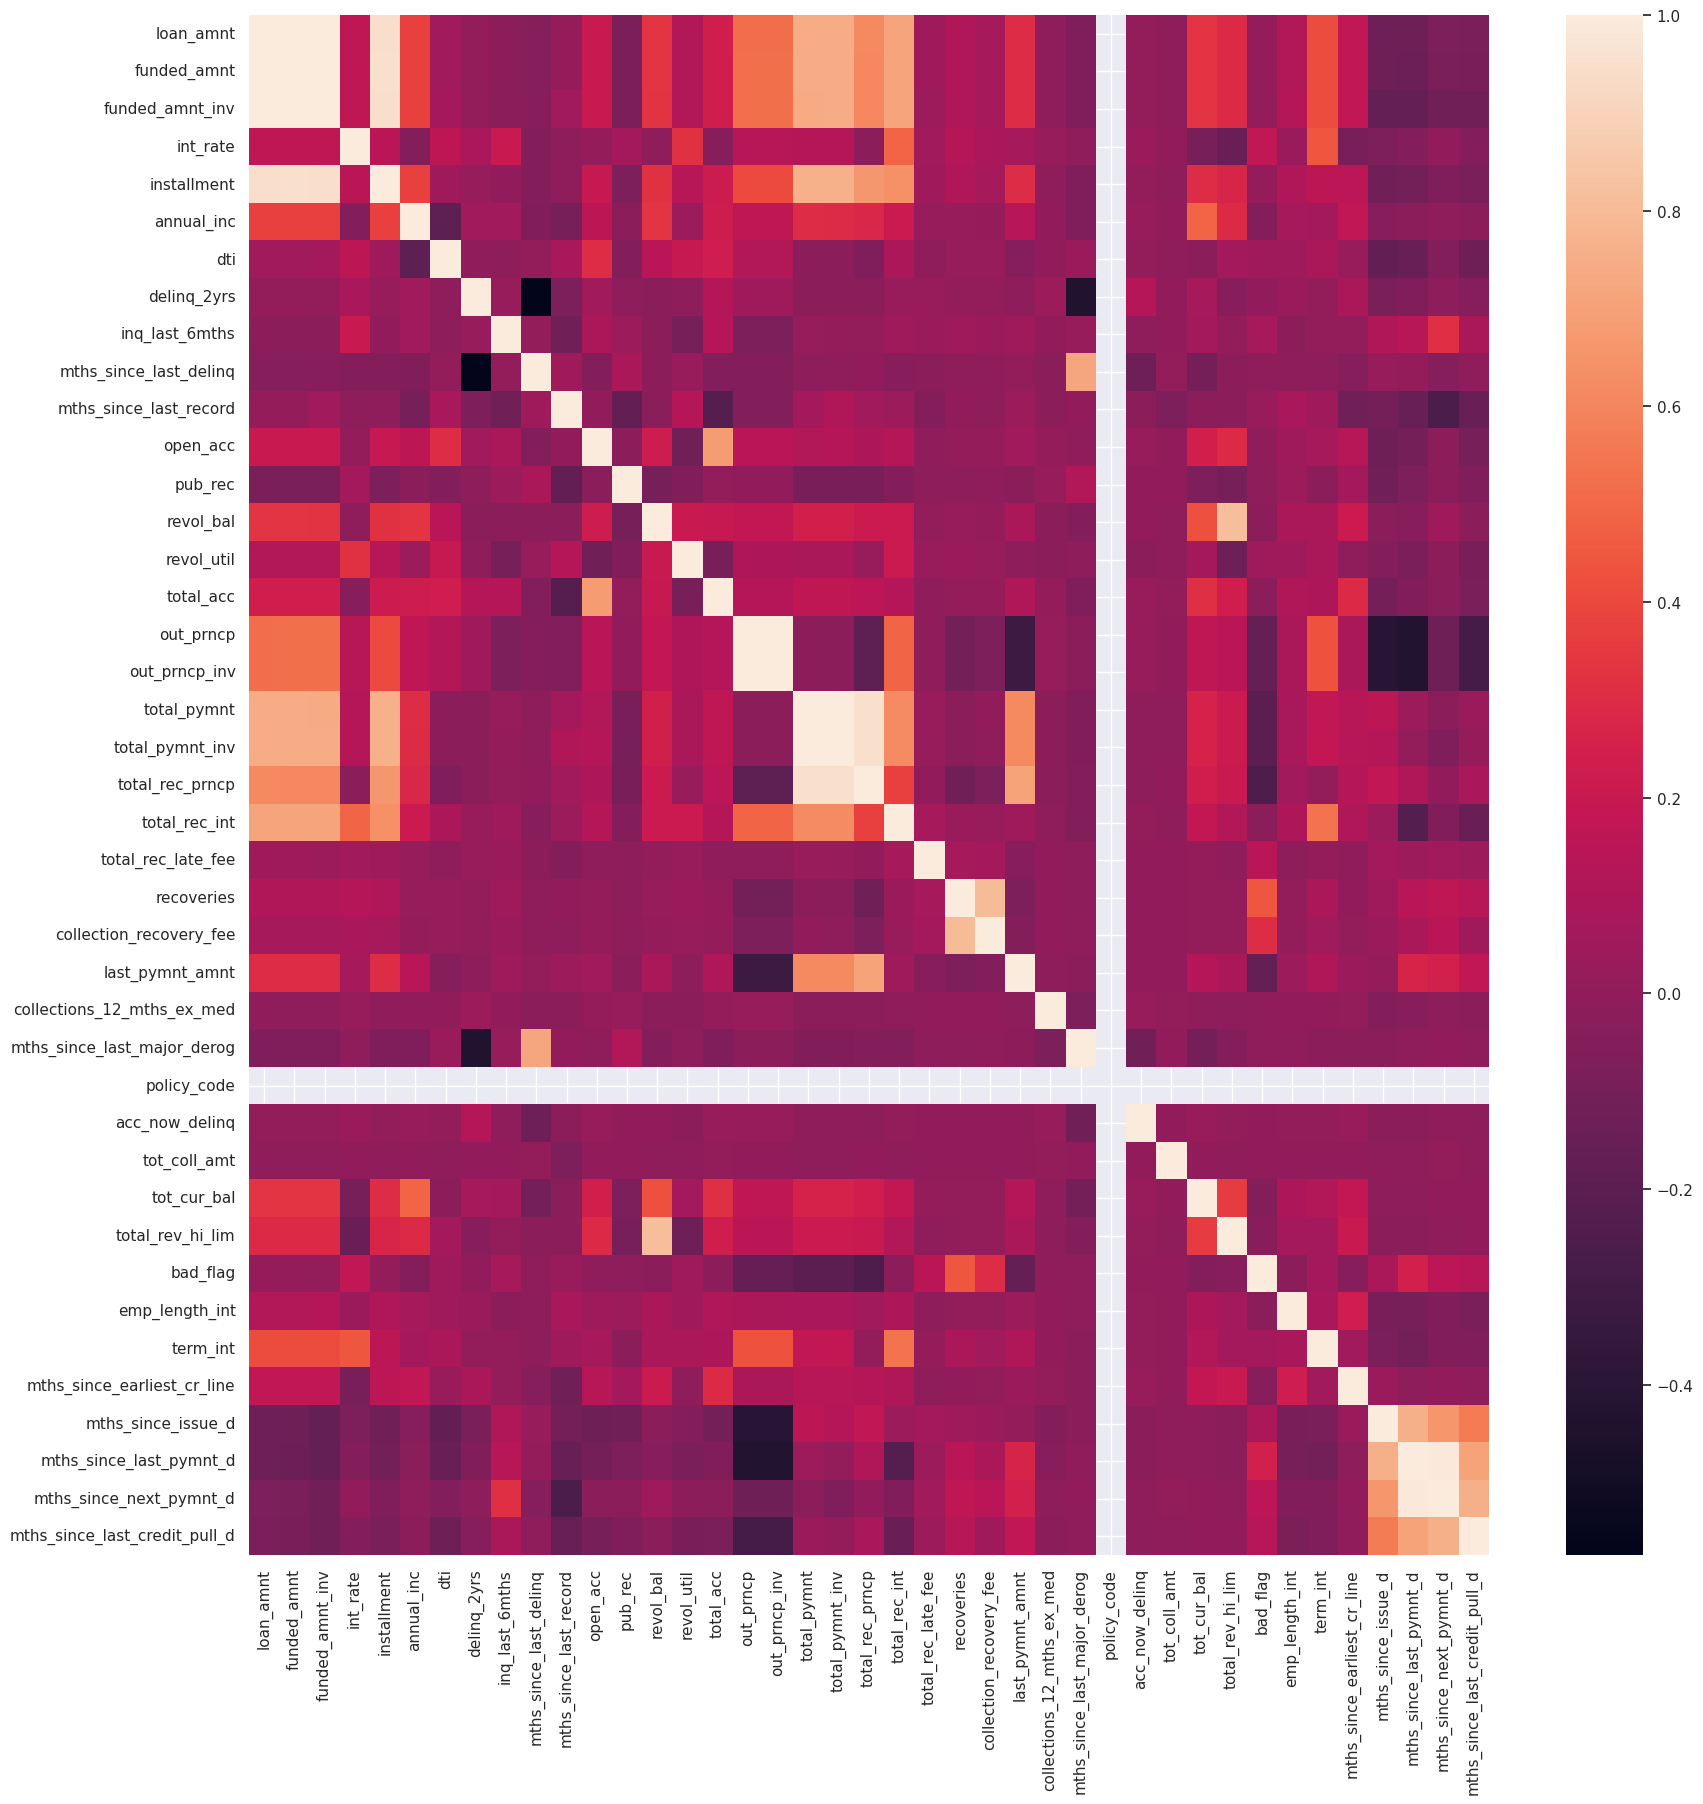

In [46]:
plt.figure(figsize=(20,20))
sns.heatmap(data_corr.corr())

In [47]:
# menghapus pasangan yang memiliki korelasi diatas 0.7
corr_matrix = data_corr.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

<ipython-input-47-fe35b102453d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data_corr.corr().abs()
<ipython-input-47-fe35b102453d>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [48]:
to_drop_hicorr

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'mths_since_last_major_derog',
 'total_rev_hi_lim',
 'mths_since_last_pymnt_d',
 'mths_since_next_pymnt_d',
 'mths_since_last_credit_pull_d']

In [49]:
data_corr.drop(to_drop_hicorr, axis=1, inplace=True)

### categorical Feature

In [50]:
data_corr.select_dtypes(include='object').nunique()

grade                       7
emp_title              205475
home_ownership              6
verification_status         3
pymnt_plan                  2
purpose                    14
title                   63099
addr_state                 50
initial_list_status         2
application_type            1
dtype: int64

menghilangkan fiur yang memiliki 1 nilai dan yang memiliki nilai terbanyak

In [51]:
data_corr.drop(['emp_title', 'title', 'application_type'], axis=1, inplace=True)

In [52]:
data_corr.select_dtypes(exclude='object').nunique()

loan_amnt                        1352
int_rate                          506
annual_inc                      31901
dti                              3997
delinq_2yrs                        24
inq_last_6mths                     28
mths_since_last_delinq            145
mths_since_last_record            123
open_acc                           62
pub_rec                            26
revol_bal                       58142
revol_util                       1269
total_acc                         112
out_prncp                      135665
total_rec_late_fee               5808
recoveries                      22773
collections_12_mths_ex_med          9
policy_code                         1
acc_now_delinq                      6
tot_coll_amt                     6321
tot_cur_bal                    220690
bad_flag                            2
emp_length_int                     11
term_int                            2
mths_since_earliest_cr_line       515
mths_since_issue_d                 91
dtype: int64

In [53]:
data_corr.drop(['policy_code'], axis=1, inplace=True)

In [54]:
for col in data_corr.select_dtypes(include='object').columns.tolist():
    print(data_corr[col].value_counts(normalize=True)*100)
    print('\n')

B    29.365946
C    26.870476
D    16.489486
A    16.056060
E     7.668486
F     2.837106
G     0.712440
Name: grade, dtype: float64


MORTGAGE    50.586015
RENT        40.420129
OWN          8.943886
OTHER        0.039032
NONE         0.010723
ANY          0.000214
Name: home_ownership, dtype: float64


Verified           36.041262
Source Verified    32.167666
Not Verified       31.791072
Name: verification_status, dtype: float64


n    99.99807
y     0.00193
Name: pymnt_plan, dtype: float64


debt_consolidation    58.804165
credit_card           22.337626
home_improvement       5.691155
other                  5.080584
major_purchase         2.107724
small_business         1.504016
car                    1.157447
medical                0.986950
moving                 0.642097
vacation               0.533365
wedding                0.502482
house                  0.486612
educational            0.090503
renewable_energy       0.075276
Name: purpose, dtype: float64


CA    15.323247
NY  

menghilangakan 'pymnt_plan' dikarenakan didominasi 1 nilai

n    99.99807

y     0.00193

##Missing Value Handling

In [55]:
data_preprocessing = data_corr.copy()

In [56]:
check_missing = data_preprocessing.isnull().sum() * 100 / data_preprocessing.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

mths_since_last_record         86.566585
mths_since_last_delinq         53.690554
tot_coll_amt                   15.071469
tot_cur_bal                    15.071469
emp_length_int                  4.505399
revol_util                      0.072917
collections_12_mths_ex_med      0.031097
delinq_2yrs                     0.006219
inq_last_6mths                  0.006219
open_acc                        0.006219
pub_rec                         0.006219
total_acc                       0.006219
acc_now_delinq                  0.006219
mths_since_earliest_cr_line     0.006219
annual_inc                      0.000858
dtype: float64

menghilangkan data yang terlalu banyak null

In [57]:
data_preprocessing.drop('mths_since_last_record', axis=1, inplace=True)

mengisi nilai null

In [58]:
data_preprocessing['annual_inc'].fillna(data_preprocessing['annual_inc'].mean(), inplace=True)
data_preprocessing['mths_since_earliest_cr_line'].fillna(0, inplace=True)
data_preprocessing['acc_now_delinq'].fillna(0, inplace=True)
data_preprocessing['total_acc'].fillna(0, inplace=True)
data_preprocessing['pub_rec'].fillna(0, inplace=True)
data_preprocessing['open_acc'].fillna(0, inplace=True)
data_preprocessing['inq_last_6mths'].fillna(0, inplace=True)
data_preprocessing['delinq_2yrs'].fillna(0, inplace=True)
data_preprocessing['collections_12_mths_ex_med'].fillna(0, inplace=True)
data_preprocessing['revol_util'].fillna(0, inplace=True)
data_preprocessing['emp_length_int'].fillna(0, inplace=True)
data_preprocessing['tot_cur_bal'].fillna(0, inplace=True)
data_preprocessing['tot_coll_amt'].fillna(0, inplace=True)
data_preprocessing['mths_since_last_delinq'].fillna(-1, inplace=True)

##Feature Scalling & Transformation

In [59]:
data_scaled = data_preprocessing.copy()

###One Hot Encoding

In [60]:
categorical_cols = [col for col in data_scaled.select_dtypes(include='object').columns.tolist()]

In [61]:
onehot = pd.get_dummies(data_scaled[categorical_cols], drop_first=True)

In [62]:
onehot.head()

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,pymnt_plan_y,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w
0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


###Standarization

In [63]:
numerical_cols = [col for col in data_scaled.columns.tolist() if col not in categorical_cols + ['bad_flag']]

In [64]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(data_scaled[numerical_cols]), columns=numerical_cols)

In [65]:
std.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d
0,-1.124392,-0.729587,-0.896551,1.328632,-0.357012,0.178920,-0.708792,-1.641166,-0.31429,-0.124888,1.159498,-1.384557,-0.693944,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.138605,-0.616225,1.764941,1.446626
1,-1.426088,0.330634,-0.787387,-2.065791,-0.357012,3.843328,-0.708792,-1.641166,-0.31429,-0.703378,-1.965980,-1.815538,-0.693944,-0.123464,0.057470,-0.083608,-0.058307,-0.012089,-0.792648,-1.523744,1.622784,-0.212426,1.446626
2,-1.438156,0.488979,-1.110294,-1.082491,-0.357012,1.095022,-0.708792,-1.841641,-0.31429,-0.642003,1.782070,-1.298361,-0.693944,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.138605,-0.616225,-0.570896,1.446626
3,-0.521001,-0.077850,-0.438063,0.354248,-0.357012,0.178920,0.860811,-0.237839,-0.31429,-0.514224,-1.478018,1.028934,-0.693944,3.099264,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.138605,-0.616225,0.226989,1.446626
4,-1.365749,-0.261438,0.122311,0.091865,-0.357012,-0.737182,0.991612,0.764538,-0.31429,0.558748,-0.094058,1.115130,-0.573268,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,-1.257509,1.622784,0.238553,1.446626


###Transformed Dataframe

In [66]:
data_clean = pd.concat([onehot, std, data_scaled[['bad_flag']]], axis=1)

#Modeling

##Split data

In [67]:
data_model = data_clean.copy()

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X = data_model.drop('bad_flag', axis=1)
y = data_model['bad_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
X_train.shape, X_test.shape

((373028, 100), (93257, 100))

##Train random forest

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rfc = RandomForestClassifier(max_depth=4)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

##Feature importance

In [73]:
arr_feature_importances = rfc.feature_importances_
arr_feature_names = X_train.columns.values

df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
df_all_features.head(25)

,feature,importance
91,recoveries,0.481427
89,out_prncp,0.195579
90,total_rec_late_fee,0.123190
78,int_rate,0.054710
99,mths_since_issue_d,0.024421
3,grade_E,0.020014
97,term_int,0.017543
4,grade_F,0.014892
2,grade_D,0.012624
79,annual_inc,0.008509


##Validation

In [74]:
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

##Auc

In [75]:
from sklearn.metrics import roc_curve, roc_auc_score

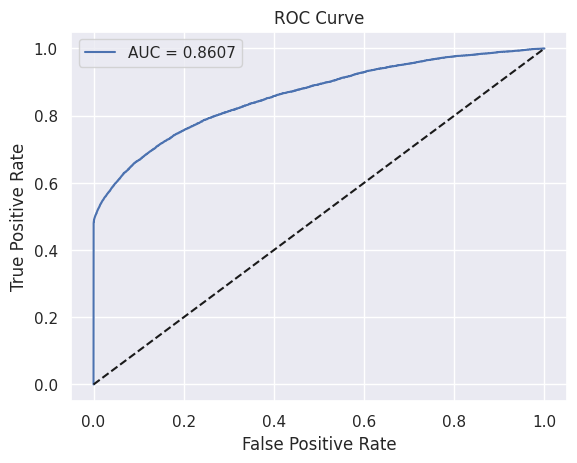

In [76]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

##KS

In [77]:
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

In [78]:
df_actual_predicted.head()

,index,y_actual,y_pred_proba,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,312703,0,0.046138,1,0,1,0.000011,0.0,0.000012
1,279378,0,0.046170,2,0,2,0.000021,0.0,0.000024
2,321938,0,0.046194,3,0,3,0.000032,0.0,0.000036
3,322307,0,0.046509,4,0,4,0.000043,0.0,0.000048
4,318621,0,0.046520,5,0,5,0.000054,0.0,0.000060


Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.5686')

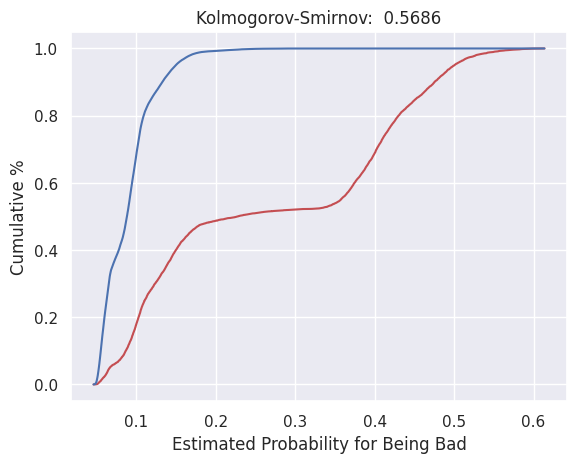

In [79]:
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

#Model Evaluation

In [85]:
#10 kolom terpilih berdasarkan feature importance
new_feature = ['recoveries','out_prncp','total_rec_late_fee','int_rate','mths_since_issue_d',
               'grade_E','term_int','grade_F','grade_D','annual_inc','bad_flag']

In [86]:
data_eval = data_clean.copy()

In [87]:
data_eval = data_eval[new_feature]

In [88]:
data_eval.sample(5)

,recoveries,out_prncp,total_rec_late_fee,int_rate,mths_since_issue_d,grade_E,term_int,grade_F,grade_D,annual_inc,bad_flag
406720,-0.154549,-0.693944,-0.123464,1.413803,-0.505936,1,-0.616225,0,0,-0.812859,1
450150,-0.154549,-0.292280,-0.123464,0.034598,-0.366467,0,-0.616225,0,0,-0.459896,0
437636,-0.154549,-0.029800,-0.123464,0.075905,-0.436201,0,-0.616225,0,0,-0.564220,0
249175,-0.154549,0.456828,-0.123464,-0.422077,-0.994076,0,-0.616225,0,0,-0.332538,0
193047,-0.154549,-0.693944,-0.123464,0.114918,0.749282,0,-0.616225,0,0,-0.532672,0


##Split data eval

In [89]:
X = data_eval.drop('bad_flag', axis=1)
y = data_eval['bad_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
X_train.shape, X_test.shape

((373028, 10), (93257, 10))

##New random forest

In [91]:
rfc = RandomForestClassifier(max_depth=4)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

## new validation

In [92]:
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

##Auc

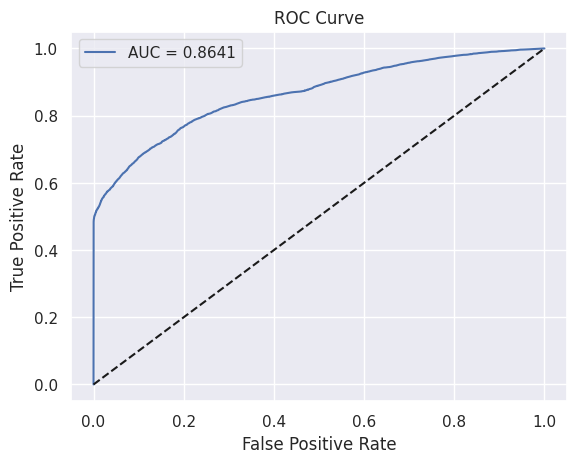

In [93]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

##KS

In [94]:
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

In [95]:
df_actual_predicted.head()

,index,y_actual,y_pred_proba,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,375263,0,0.027029,1,0,1,0.000011,0.0,0.000012
1,380480,0,0.027029,2,0,2,0.000021,0.0,0.000024
2,239849,0,0.027029,3,0,3,0.000032,0.0,0.000036
3,48568,0,0.027029,4,0,4,0.000043,0.0,0.000048
4,307888,0,0.027029,5,0,5,0.000054,0.0,0.000060


Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.5770')

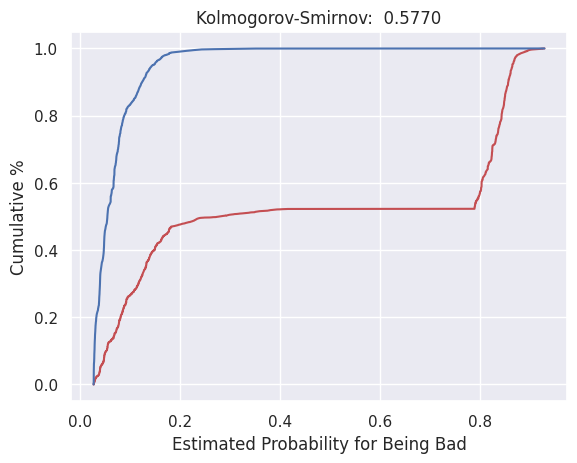

In [96]:
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

Dengan menggunakan 10 data dengan feature importance tinggi, keuntungan yang didapat yaitu:


*   menghemat komputasi dikarenakan lebih sedikit fitur
*   meningkatkan skor peforma Auc dan KS
    *  Auc : 0.8607 -> 0.8641
    *  Kolmogorov-Smirnov : 0.5686 -> 0.5770



